In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx')
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df['date'] = (
    pd.to_datetime('2018-12-31') - pd.to_timedelta(df['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [19]:
daily_revenue = (
    df.groupby('date')
    .agg(
        {
            'LodgingRevenue':'sum',
            'OtherRevenue':'sum'
        }
    )
)

In [20]:
mountly_revenue = daily_revenue.resample('ME').sum()

In [21]:
mountly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


Text(0.5, 1.0, 'LodgingRevenue and OtherRevenue by day')

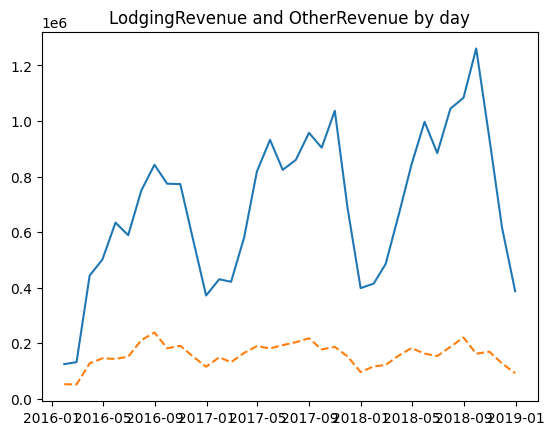

In [ ]:
fig, ax = plt.subplots()

ax.plot(mountly_revenue.index, mountly_revenue['LodgingRevenue'])
ax.plot(mountly_revenue.index, mountly_revenue['OtherRevenue'], ls='--')

ax.set_title('LodgingRevenue and OtherRevenue by day')

Dados para alterar no DF:

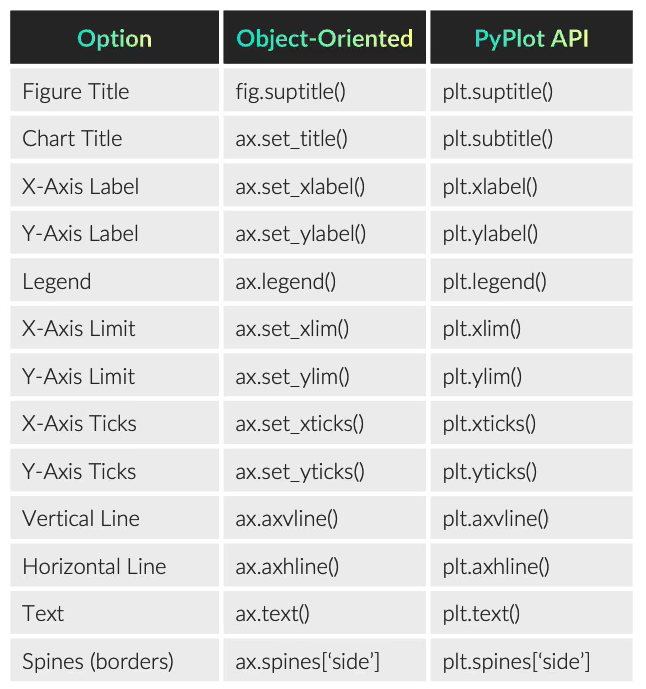